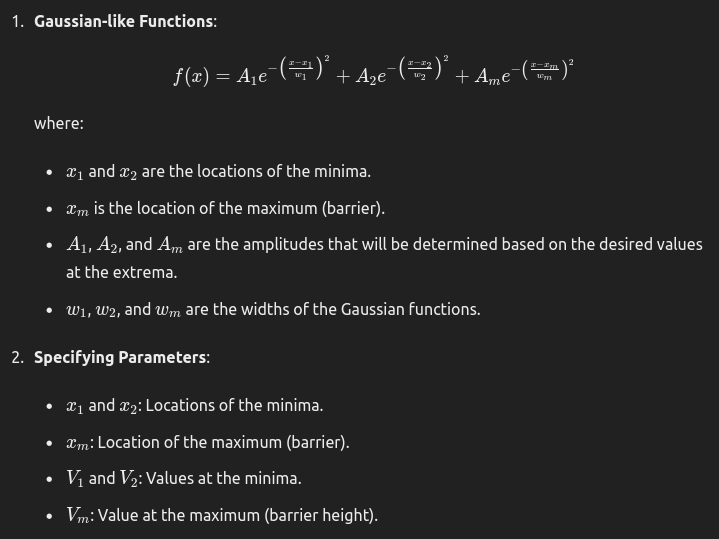

A1=-2.9984306623906316, A2=-5.0000000000002, Am=6.235107362393493, w1=0.520421938809253, wm=0.32906358123352797, w2=1.0784000138556546


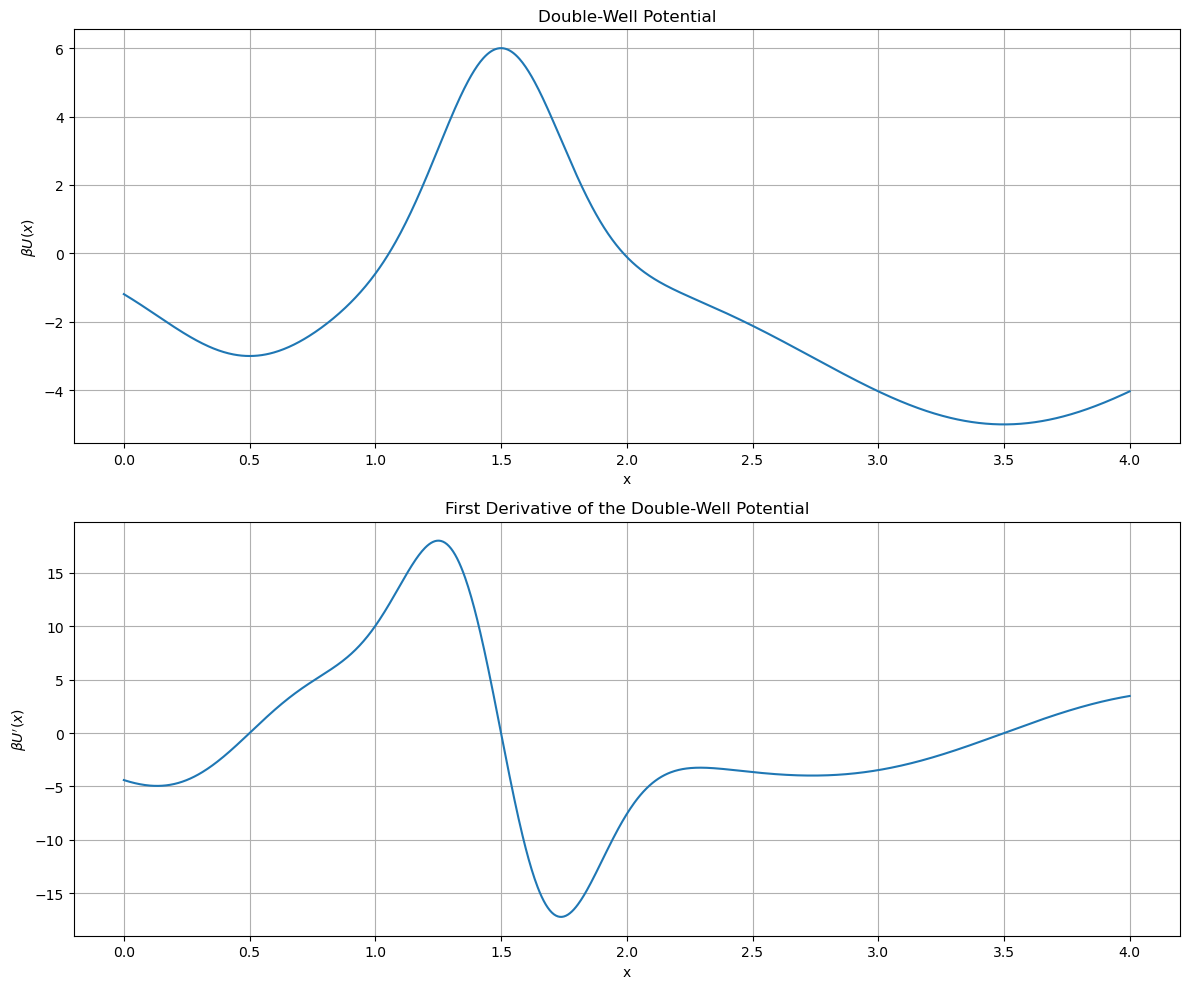

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def double_well_potential(x, x1, x2, xm, V1, V2, Vm):
    # System of equations to determine A1, A2, Am, w1, w2, wm
    def equations(vars):
        A1, A2, Am, w1, w2, wm = vars
        eq1 = A1 * np.exp(-((x1 - x1) / w1) ** 2) + A2 * np.exp(-((x1 - x2) / w2) ** 2) + Am * np.exp(-((x1 - xm) / wm) ** 2) - V1
        eq2 = A1 * np.exp(-((x2 - x1) / w1) ** 2) + A2 * np.exp(-((x2 - x2) / w2) ** 2) + Am * np.exp(-((x2 - xm) / wm) ** 2) - V2
        eq3 = A1 * np.exp(-((xm - x1) / w1) ** 2) + A2 * np.exp(-((xm - x2) / w2) ** 2) + Am * np.exp(-((xm - xm) / wm) ** 2) - Vm
        eq4 = -2 * A1 * (xm - x1) / (w1 ** 2) * np.exp(-((xm - x1) / w1) ** 2) - 2 * A2 * (xm - x2) / (w2 ** 2) * np.exp(-((xm - x2) / w2) ** 2) - 2 * Am * (xm - xm) / (wm ** 2) * np.exp(-((xm - xm) / wm) ** 2)
        eq5 = -2 * A1 * (x1 - x1) / (w1 ** 2) * np.exp(-((x1 - x1) / w1) ** 2) - 2 * A2 * (x1 - x2) / (w2 ** 2) * np.exp(-((x1 - x2) / w2) ** 2) - 2 * Am * (x1 - xm) / (wm ** 2) * np.exp(-((x1 - xm) / wm) ** 2)
        eq6 = -2 * A1 * (x2 - x1) / (w1 ** 2) * np.exp(-((x2 - x1) / w1) ** 2) - 2 * A2 * (x2 - x2) / (w2 ** 2) * np.exp(-((x2 - x2) / w2) ** 2) - 2 * Am * (x2 - xm) / (wm ** 2) * np.exp(-((x2 - xm) / wm) ** 2)
        return [eq1, eq2, eq3, eq4, eq5, eq6]
    
    # Initial guess for A1, A2, Am, w1, w2, wm
    initial_guess = [V1, V2, Vm, 0.5, 1.0, 0.6]
    
    # Solve the system of equations
    A1, A2, Am, w1, w2, wm = fsolve(equations, initial_guess)
    print(f"A1={A1}, A2={A2}, Am={Am}, w1={w1}, wm={wm}, w2={w2}")
    
    # Define the potential function
    def V(x):
        return A1 * np.exp(-((x - x1) / w1) ** 2) + A2 * np.exp(-((x - x2) / w2) ** 2) + Am * np.exp(-((x - xm) / wm) ** 2)
    
    # Define the first derivative of the potential function
    def dV_dx(x):
        term1 = -2 * A1 * (x - x1) / (w1 ** 2) * np.exp(-((x - x1) / w1) ** 2)
        term2 = -2 * A2 * (x - x2) / (w2 ** 2) * np.exp(-((x - x2) / w2) ** 2)
        term3 = -2 * Am * (x - xm) / (wm ** 2) * np.exp(-((x - xm) / wm) ** 2)
        return term1 + term2 + term3
    
    return V, dV_dx

# Parameters
x1 = 0.5    # Location of the first minimum
xm = 1.5     # Location of the maximum (barrier)
x2 = 3.5     # Location of the second minimum
V1 = -3.0    # Value at the first minimum
V2 = -5.0  # Value at the second minimum
Vm = 6.0   # Value at the maximum (barrier height)

# x range for plotting
x = np.linspace(0, 4, 1000)

# Calculate the potential and its derivative
potential_func, dV_dx_func = double_well_potential(x, x1, x2, xm, V1, V2, Vm)
potential = potential_func(x)
dV_dx = dV_dx_func(x)

# Plotting the potential
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(x, potential)
plt.xlabel('x')
plt.ylabel("$ \\beta U(x)$")
plt.title('Double-Well Potential')
plt.grid(True)

# Plotting the first derivative of the potential
plt.subplot(2, 1, 2)
plt.plot(x, dV_dx)
plt.xlabel('x')
plt.ylabel("$ \\beta U'(x)$")
plt.title("First Derivative of the Double-Well Potential")
plt.grid(True)

plt.tight_layout()
plt.show()
